Keith Fleming

Fantasy Football Data Visualization

In [3]:
import pandas as pd
import numpy as np
import fantasy_football.src.data.ff as ffdb
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline
plt.style.use('ggplot')



Loading the data. The load function is a wrapper function for several data cleaning functions. Some work still needs to be done to get the future fantasy points and cformatting the name.

In [2]:
fantasy2013 = ffdb.load_data("2013_Fantasy")
fantasy2014 = ffdb.load_data("2014_Fantasy")
fantasy2015 = ffdb.load_data("2015_Fantasy")

fantasy2013df = pd.DataFrame(fantasy2013)
fantasy2014df = pd.DataFrame(fantasy2014)
fantasy2015df = pd.DataFrame(fantasy2015)

Showing the first ten players in the 2013 NFL Fantasy Football dataset.

In [3]:
print(fantasy2013df.head(10))

   Rk                        Name   Tm FantPos  Age   G  GS  Cmp  PassAtt  \
0   1   Jamaal Charles*+\CharJa00  KAN      RB   27  15  15    0        0   
1   2   Peyton Manning*+\MannPe00  DEN      QB   37  16  16  450      659   
2   3     LeSean McCoy*+\McCoLe01  PHI      RB   25  16  16    0        0   
3   4        Matt Forte*\FortMa00  CHI      RB   28  16  16    0        0   
4   5    Marshawn Lynch*\LyncMa00  SEA      RB   27  16  16    0        0   
5   6    Knowshon Moreno\MoreKn00  DEN      RB   26  16  15    0        0   
6   7  Demaryius Thomas*\ThomDe03  DEN      WR   26  16  16    0        0   
7   8      Josh Gordon*+\GordJo02  CLE      WR   22  14  14    0        0   
8   9   Calvin Johnson*+\JohnCa00  DET      WR   28  14  14    0        0   
9  10        Drew Brees*\BreeDr00  NOR      QB   34  16  16  446      650   

   PassYds   ...    RecYds    Y/R  RecTD  FantPt  PPR   DKPt   FDPt    VBD  \
0        0   ...       693   9.90      7   308.0  NaN  386.0  343.0  182.0

Getting summary statistics for each of the variables in the dataset. PPR is NaN for all players so it should be remved. OvRank has a limited number of values, so it may not be very useful.

In [13]:
print(fantasy2015df.describe())
#PPR is empty for all three years and will be removed
#OvRank has limited values

               Rk         Age           G          GS         Cmp     PassAtt  \
count  551.000000  551.000000  551.000000  551.000000  551.000000  551.000000   
mean   278.245009   26.312160   11.399274    5.526316   20.914701   33.197822   
std    161.855378    3.387224    4.743255    5.539506   74.931156  117.851659   
min      1.000000   21.000000    1.000000    0.000000    0.000000    0.000000   
25%    139.500000   24.000000    8.000000    0.000000    0.000000    0.000000   
50%    277.000000   26.000000   13.000000    4.000000    0.000000    0.000000   
75%    414.500000   28.000000   16.000000   10.000000    0.000000    0.000000   
max    595.000000   40.000000   16.000000   16.000000  437.000000  661.000000   

           PassYds      PassTD         Int     RushAtt    ...      \
count   551.000000  551.000000  551.000000  551.000000    ...       
mean    240.778584    1.528131    0.791289   24.450091    ...       
std     871.126728    5.900896    2.791219   53.052056    ...  

Generating a histogram for the yardage by position. A significant portion of the data is within the first few bins, which makes sense because QBs do not frequently catch of rush the ball. It may make sense to create subsets of the data by position for model creation because the positions do different things.

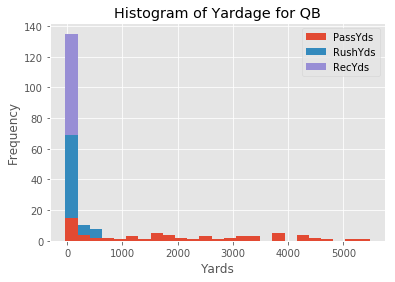

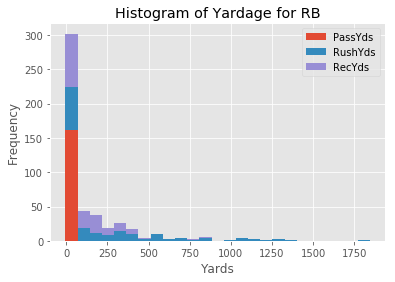

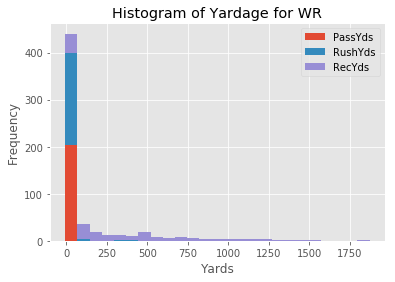

In [34]:
ffdb.hist_yards_by_pos(fantasy2013df, pos = 'QB')
ffdb.hist_yards_by_pos(fantasy2014df, pos = 'RB')
ffdb.hist_yards_by_pos(fantasy2015df, pos = 'WR')

Following up on the histogram, the next plots are barcharts for yardage by position. TE and WR are somewhat similiar by only having RecYds. It seems that three different models and combining results may be the best route.

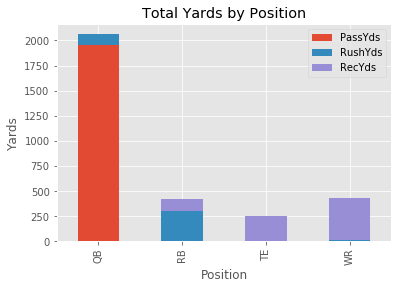

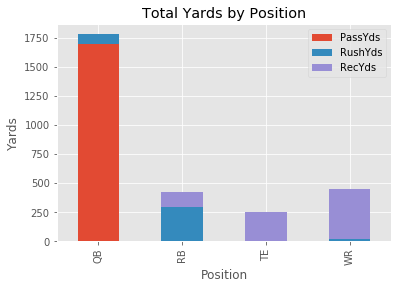

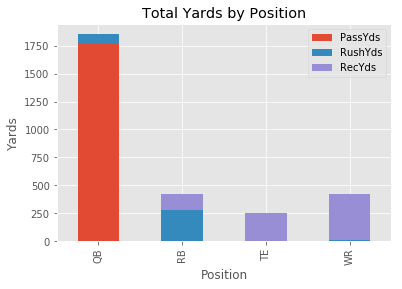

In [36]:
ffdb.plot_yards_by_position(fantasy2013df)
ffdb.plot_yards_by_position(fantasy2014df)
ffdb.plot_yards_by_position(fantasy2015df)


The next plot is a barchart of total fantasy points by team. Some teams have better players than others so if a team has a better QB, all of the other positions should see some benefit.

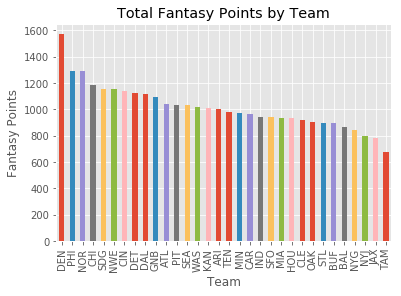

In [40]:
ffdb.total_fantasy_points_by_team(fantasy2013df)

The next plot is a scatter plot of fantasy points vs age. The data seems to be fairly random, but it may be worthwile to look further based on position.

Text(0.5,1,'Fantasy Points vs. Age')

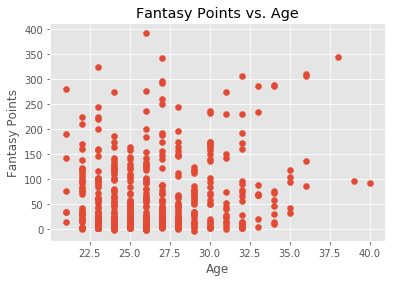

In [33]:
plt.scatter(fantasy2015df['Age'], fantasy2015df['FantPt'])
plt.xlabel('Age')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points vs. Age')